<a href="https://colab.research.google.com/github/RileyWClarke/MLTSA_COVID19/blob/master/covid19_dist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")

from fbprophet import Prophet, diagnostics
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric, add_changepoints_to_plot, plot_plotly

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd gdrive/Shared\ drives/

/content/gdrive/Shared drives


In [4]:
cd Covid19_project/

/content/gdrive/Shared drives/Covid19_project


In [6]:
cd data_sets/

/content/gdrive/Shared drives/Covid19_project/data_sets


In [9]:
ls

global1/  skcv19_data/  usa_1/  weather_sk/


In [0]:
us_state = pd.read_csv('usa_1/us_states_covid19_daily.csv') 
skorea = pd.read_csv('skcv19_data/Time.csv') 

In [11]:
us_state.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200430,AK,355.0,18764.0,NaN,19.0,NaN,NaN,NaN,NaN,NaN,252.0,78605f774dcba587c8b24512354a3830ef3b5e4f,2020-04-30T20:00:00Z,9.0,NaN,19119.0,19119.0,19119.0,2,0.0,0.0,0.0,0.0,0.0
1,20200430,AL,7019.0,80177.0,NaN,NaN,978.0,NaN,335.0,NaN,195.0,NaN,47546b95299bd673c18e27d5284d7ba75b362464,2020-04-30T20:00:00Z,269.0,978.0,87196.0,87196.0,87196.0,1,24.0,33.0,6570.0,177.0,6747.0
2,20200430,AR,3255.0,45124.0,NaN,95.0,402.0,NaN,NaN,23.0,85.0,1305.0,8f880ed4454e1fc3bbeff4b0655314f8878cbe22,2020-04-30T20:00:00Z,61.0,402.0,48379.0,48379.0,48379.0,5,2.0,13.0,2867.0,63.0,2930.0
3,20200430,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14c16072106c6d59a534dfcbd590ca14f42e4a7f,2020-04-30T20:00:00Z,0.0,NaN,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,20200430,AZ,7648.0,64138.0,NaN,755.0,1169.0,311.0,NaN,194.0,NaN,1499.0,eb3be7d08e6c0e46e5aa79eb92b2da29f2e6dc13,2020-04-30T20:00:00Z,320.0,1169.0,71786.0,71786.0,71786.0,4,16.0,38.0,2527.0,446.0,2973.0


In [26]:
us_state['state'].unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

In [12]:
skorea.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [18]:
skorea_d10 = skorea.loc[skorea['deceased'] >= 10]
skorea_d10

,date,time,test,negative,confirmed,released,deceased
36,2020-02-25,16,40304,25447,977,24,12
37,2020-02-26,16,53553,31576,1261,24,12
38,2020-02-27,16,66652,39318,1766,26,13
39,2020-02-28,16,81167,48593,2337,27,13
40,2020-02-29,16,94055,55723,3150,28,17
...,...,...,...,...,...,...,...
97,2020-04-26,0,598285,578558,10728,8717,242
98,2020-04-27,0,601660,582027,10738,8764,243
99,2020-04-28,0,608514,588559,10752,8854,244
100,2020-04-29,0,614197,595129,10761,8922,246


In [20]:
d10 = np.arange(0,len(skorea_d10),1)
skorea_d10['d10'] = d10
skorea_d10

,date,time,test,negative,confirmed,released,deceased,d10
36,2020-02-25,16,40304,25447,977,24,12,0
37,2020-02-26,16,53553,31576,1261,24,12,1
38,2020-02-27,16,66652,39318,1766,26,13,2
39,2020-02-28,16,81167,48593,2337,27,13,3
40,2020-02-29,16,94055,55723,3150,28,17,4
...,...,...,...,...,...,...,...,...
97,2020-04-26,0,598285,578558,10728,8717,242,61
98,2020-04-27,0,601660,582027,10738,8764,243,62
99,2020-04-28,0,608514,588559,10752,8854,244,63
100,2020-04-29,0,614197,595129,10761,8922,246,64


Text(0, 0.5, 'Deaths')

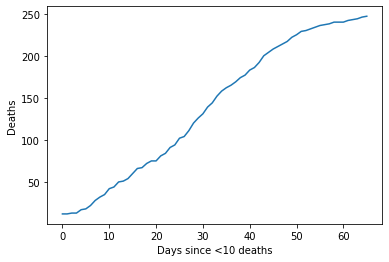

In [28]:
plt.plot(skorea_d10['d10'], skorea_d10['deceased'])
plt.xlabel('Days since <10 deaths')
plt.ylabel('Deaths')

In [0]:
states = ['CA', 'NY', 'DC']

us_CA = us_state.loc[(us_state['state'] == 'CA') & (us_state['death'] >= 10)][['date', 'state', 'death']]
us_NY = us_state.loc[(us_state['state'] == 'NY') & (us_state['death'] >= 10)][['date', 'state', 'death']]
us_DC = us_state.loc[(us_state['state'] == 'DC') & (us_state['death'] >= 10)][['date', 'state', 'death']]
us_NE = us_state.loc[(us_state['state'] == 'NE') & (us_state['death'] >= 10)][['date', 'state', 'death']]
us_FL = us_state.loc[(us_state['state'] == 'FL') & (us_state['death'] >= 10)][['date', 'state', 'death']]


us_CA['d10'] = np.arange(0,len(us_CA),1)
us_NY['d10'] = np.arange(0,len(us_NY),1)
us_DC['d10'] = np.arange(0,len(us_DC),1)
us_NE['d10'] = np.arange(0,len(us_NE),1)
us_FL['d10'] = np.arange(0,len(us_FL),1)

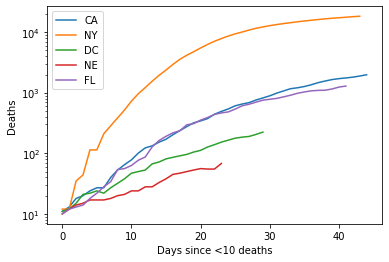

In [79]:
plt.plot(us_CA['d10'], us_CA['death'][::-1], label='CA')
plt.plot(us_NY['d10'], us_NY['death'][::-1], label='NY')
plt.plot(us_DC['d10'], us_DC['death'][::-1], label='DC')
plt.plot(us_NE['d10'], us_NE['death'][::-1], label='NE')
plt.plot(us_FL['d10'], us_FL['death'][::-1], label='FL')
plt.yscale('log')
plt.xlabel('Days since <10 deaths')
plt.ylabel('Deaths')
plt.legend();

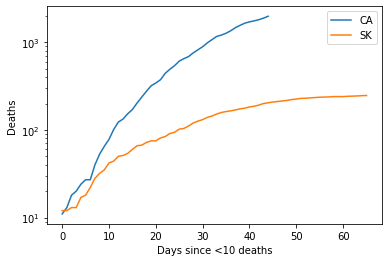

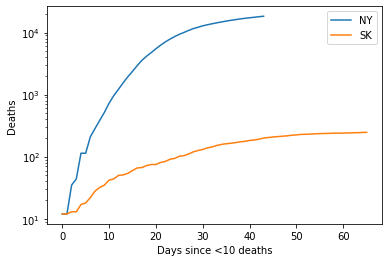

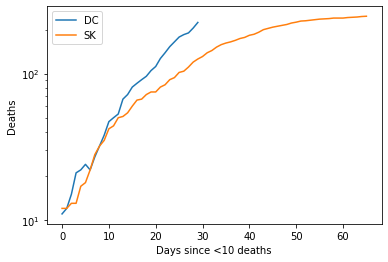

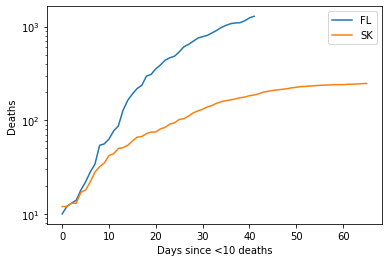

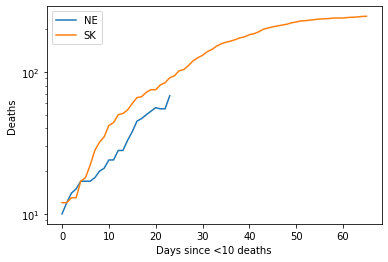

In [80]:
plt.plot(us_CA['d10'], us_CA['death'][::-1], label='CA')
plt.plot(skorea_d10['d10'], skorea_d10['deceased'], label='SK')
plt.yscale('log')
plt.xlabel('Days since <10 deaths')
plt.ylabel('Deaths')
plt.legend()
plt.show()

plt.plot(us_NY['d10'], us_NY['death'][::-1], label='NY')
plt.plot(skorea_d10['d10'], skorea_d10['deceased'], label='SK')
plt.yscale('log')
plt.xlabel('Days since <10 deaths')
plt.ylabel('Deaths')
plt.legend()
plt.show()

plt.plot(us_DC['d10'], us_DC['death'][::-1], label='DC')
plt.plot(skorea_d10['d10'], skorea_d10['deceased'], label='SK')
plt.yscale('log')
plt.xlabel('Days since <10 deaths')
plt.ylabel('Deaths')
plt.legend()
plt.show()

plt.plot(us_FL['d10'], us_FL['death'][::-1], label='FL')
plt.plot(skorea_d10['d10'], skorea_d10['deceased'], label='SK')
plt.yscale('log')
plt.xlabel('Days since <10 deaths')
plt.ylabel('Deaths')
plt.legend()
plt.show()

plt.plot(us_NE['d10'], us_NE['death'][::-1], label='NE')
plt.plot(skorea_d10['d10'], skorea_d10['deceased'], label='SK')
plt.yscale('log')
plt.xlabel('Days since <10 deaths')
plt.ylabel('Deaths')
plt.legend()
plt.show()

In [90]:
from scipy.spatial.distance import minkowski
print(
minkowski(us_CA['death'],skorea_d10['deceased'][:len(us_CA['death'])], p=2),
minkowski(us_NY['death'],skorea_d10['deceased'][:len(us_NY['death'])], p=2),
minkowski(us_DC['death'],skorea_d10['deceased'][:len(us_DC['death'])], p=2),
minkowski(us_NE['death'],skorea_d10['deceased'][:len(us_NE['death'])], p=2),
minkowski(us_FL['death'],skorea_d10['deceased'][:len(us_FL['death'])], p=2)
)

5933.6704492244935 66557.54894074751 557.7302215229151 217.81873197684354 3895.3895825706572


In [94]:
print(
minkowski(us_CA['death'],skorea_d10['deceased'][:len(us_CA['death'])], p=1),
minkowski(us_NY['death'],skorea_d10['deceased'][:len(us_NY['death'])], p=1),
minkowski(us_DC['death'],skorea_d10['deceased'][:len(us_DC['death'])], p=1),
minkowski(us_NE['death'],skorea_d10['deceased'][:len(us_NE['death'])], p=1),
minkowski(us_FL['death'],skorea_d10['deceased'][:len(us_FL['death'])], p=1)
)

28615.0 334003.0 2535.0 949.0 19166.0


In [93]:
from scipy.stats import pearsonr
print(
pearsonr(us_CA['death'],skorea_d10['deceased'][:len(us_CA['death'])]),
pearsonr(us_NY['death'],skorea_d10['deceased'][:len(us_NY['death'])]),
pearsonr(us_DC['death'],skorea_d10['deceased'][:len(us_DC['death'])]),
pearsonr(us_NE['death'],skorea_d10['deceased'][:len(us_NE['death'])]),
pearsonr(us_FL['death'],skorea_d10['deceased'][:len(us_FL['death'])])
)

(-0.9243100406653758, 1.3380396402939558e-19) (-0.9659967007582864, 2.6867745024437813e-26) (-0.9500379533605671, 1.0883270247953395e-15) (-0.9599958114628266, 1.2021682685190073e-13) (-0.9476379494086541, 1.953818294833725e-21)
